# Entendendo as árvores de decisão

Árvores de decisão (*Decision Trees*), como o próprio nome se refere, é um dos métodos mais utilizados para a tomada de decisão. Esta abordagem é amplamente utilizada em modelos de *machine learning*, mas também encontra espaço em outras áreas, como a [pesquisa operacional](https://en.wikipedia.org/wiki/Decision_tree).

Existem [vários algortimos](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.685.4929&rep=rep1&type=pdf) que podem ser utilizados nesta árvores, dentre eles o ID3, C4.5 e o CART. O foco será esta última abordagem que é a utilizada pelo [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart). Ela se baseia na separação binária (True | False) de condições utilizando os atributos - *features* -  dos dados.

Estes modelos de **aprendizado supervisionado** são empregados em tarefas tanto de regressão quanto classificação. O objetivo do método é criar uma árvore que aprende com os dados através de regras básicas, chamadas de *if-then rules*. O modelo identifica qual é o melhor atributo para separar os dados utilizando o critério escolhido, que neste caso pode ser *entropy* ou *gini*.

A imagem abaixo, ilustra um **exemplo** geral destas árvores e alguns de seus conceitos utilizados:

<img src='https://github.com/FerrazThales/Artigos/blob/main/decision_tree/decision_tree.drawio.png?raw=true' >

**Algumas Vantagens das árvores de decisão:**
* É um modelo intuitivo e simples de interpretar. Além disso, as árvores de decisão podem ser visualizadas.
* Não necessita de grandes pré-processamento de dados, como a normalização ou escalonamento de dados.
* Utiliza o modelo conhecido como caixa branca. Ou seja, as decisões que o modelo toma podem ser explicadas e interpretadas.

**Desvantagens**:
* Pode criar regras muito complexas que vão gerar *overfitting* nos dados.
* Podem ser instáveis, pequenas variações podem gerar modelos de árvore completamente diferentes.
* Para ter uma predições mais robustas, é aconselhável fazer *ensembles*.

O objetivo deste artigo é ajudar na compreensão das DecisionTree e avaliar alguns métodos que podem ajudar na interpretação dos seus dados e do seu modelo.

In [1]:
#importando as bibliotecas que serão utilizadas
from sklearn.datasets import load_wine
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_graphviz, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Neste artigo, iremos utilizar uma base de dados para tarefas de classificação do próprio sklearn, sobre [vinhos](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine). Ela tem 178 registros e cerca de treze features.

In [2]:
# importando os dados do toy dataset wine
x,y = load_wine(return_X_y =True, as_frame=True)

# separando em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

Inicialmente vamos instanciar nossa árvore com todos os parâmetros default. Utilizaremos o clássico fit para treinar o modelo.

In [3]:
#instanciando a árvore de decisão
tree = DecisionTreeClassifier(random_state=42) # utilizando uma decision tree com os parâmetros default

# treinando a árvore de decisão nos dados
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

Já foi falado muitas vezes que este modelo é muito fácil de interpretar e, inclusive, podemos visuáliza-lo. Chegou a hora de nosso plot!

Para isso, utilizaremos o método do scikit-learn [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)!

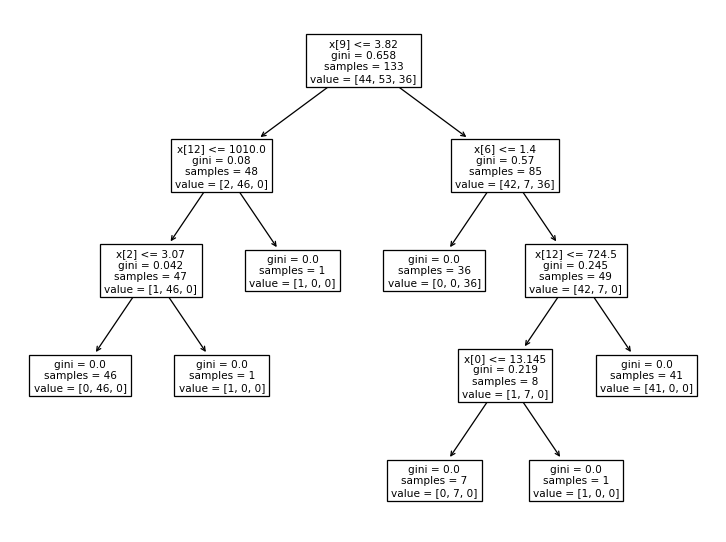

In [4]:
# criando o fig e o axes
fig, ax = plt.subplots(figsize=(8,6),dpi=92)

#criando o plot
plot_tree(tree,ax=ax)

#plotando o gráfico
plt.tight_layout();

Eu deixei em um tamanho **menor** para refletirmos: e se houvesse **várias** features? Ou seja, várias colunas em nosso dataset? Nossa árvore seria **gigantesca**!

É por conta disso, que existem alguns **parâmetros** que podemos mudar no `plot_tree`. Por exemplo, ao setar o `max_depth` como 2, nós limitamos a visão da **profundidade** da árvore para 2. As demais profundidades ficam simbolizados como três pontos (...).

Se você dar uma olhada na primeira linha de cada quadrado (nó) ele exibe um símbolo X [índice]. Este é o jeito que o modelo entende cada **feature**. Por exemplo, o x[9] é o nono elemento da nossa **lista** de atributos:

```
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']
```

Ou seja, `color_intensity`. Por conta disso, para ficar mais legível, podemos acrescentar ao parâmetro `feature_names` uma lista do nome de nossos atributos. Fazemos isso simplesmente setando `feature_names` como `x_train.columns`.

O `plot_tree` tem muitos outros parâmetros que podem auxiliar na interpretação do modelo. Te convido a visitar a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) e procurar por mais alguns que possam lhe agradar!

No código abaixo, eu trouxe alguns **novos** parâmetros e seu plot. Os que estão com # antes não estão sendo considerados no código. Deixei apenas caso alguém tenha interesse. Do lado de cada parâmetro, deixei uma explicação simples do seu efeito.



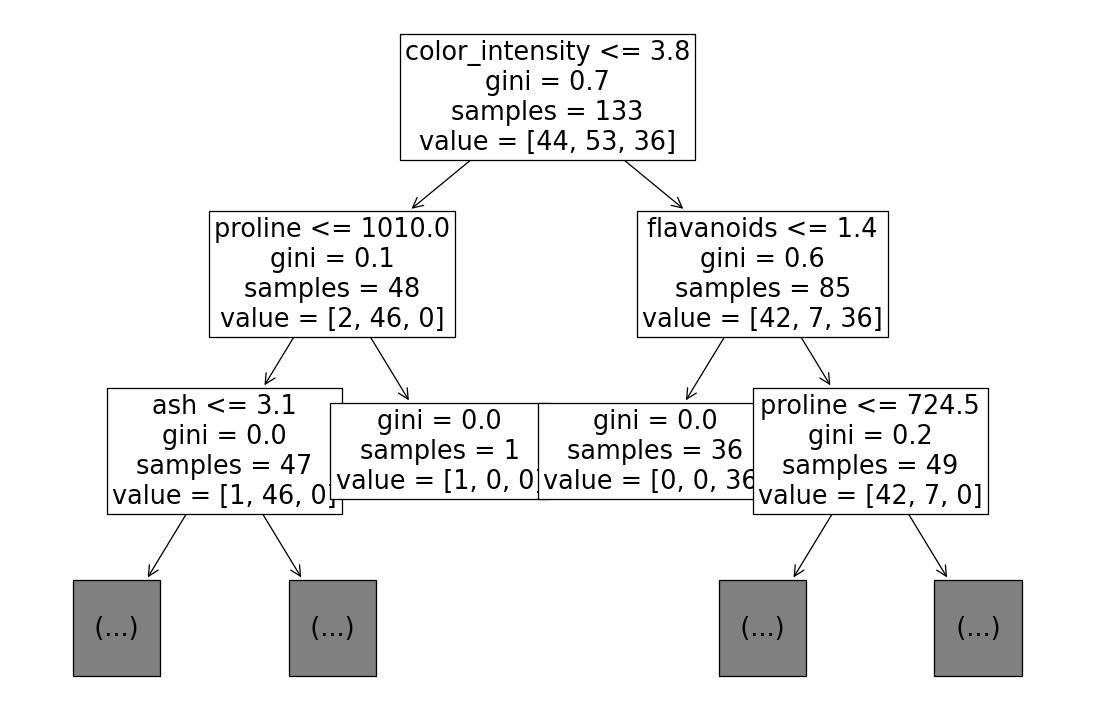

In [7]:
# criando o fig e o axes
fig, ax = plt.subplots(figsize=(12,8),dpi=92)

#criando o plot
plot_tree(tree, # a decision tree que será plotada
          feature_names = x_train.columns, # trará o nome das features utilizadas na primeira linha de cada nó
          ax=ax, # plotamos no axes criado do matplotlib
          precision=1, # precisão dos valores numéricos
          max_depth=2, #  escolhemos a profundidade da árvore
          #proportion = True # retorna a proporção dos valores das amostras
          fontsize = 20 # mudar o tamanho da fonte
        )

#plotando o gráfico
plt.tight_layout();

Show! Acredito que até agora tudo tenha ficado bem claro.

Mas uma dúvida pode surgir: como as árvores de decisão fazem a **separação** considerando o **atributo**? Por exemplo, de onde ela tirou que *color_intensity <= 3.8* é um bom *splitting*?

Para isso, ela se **baseia** nos hiperparâmetros das `DecisionTrees`: `criterion`, que é o *gini* por default, e `splitter`, que é *best* por default. Ou seja, ela faz a separação buscando reduzir o [coeficiente de gini](https://www.maxwell.vrac.puc-rio.br/7587/7587_4.PDF) da melhor (*best*) forma possível.

Utilizando a `entropy` o objetivo vai ser aumentar o [ganho de informação](http://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/indexf23d.html?id) reduzindo a entropia da próxima profundidade.

**Obs: O coeficiente de gini ou entropy mede a heterogeneidade dos dados. Esta separação busca reduzir esta impureza no próximo ramo (próxima profundidade)como um todo.**

Se voltarmos a dar uma olhada em nossas árvores plotadas, vamos observar que ela exibe outros termos: *samples* e *value*:

* Samples: é a quantidade de registros daquela amostra.
* value: quantos registros tem de cada classe naquela amostra.

A `DecisionTreeClassifier` tem **muitos** outros hiperparâmetros que podem auxiliar em uma melhor classificação de seu modelo. Novamente, te convido a visitar a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e procurar por mais alguns que possam te ajudar!

No código abaixo, eu trouxe alguns **novos** hiperparâmetros. Do lado de cada hiperparâmetro, deixei uma explicação simples do seu efeito no modelo.


In [8]:
tree = DecisionTreeClassifier(
criterion='gini', # gini vem por default, mas podemos optar por entropy
splitter='best', # a estratégia utilizada para fazer a separação de cada nó
# ela também pode ser feita de forma randômica utilizando 'random'
max_depth= None, # a máxima profundida que sua árvore de decisão pode ter
# se for None ela vai buscar a máxima pureza possível

min_samples_split = 2, # o mínimo de registros necessários para que uma separação seja feita
min_samples_leaf = 1, # o mínimo de registros necessários em cada nós-folha (veja a primeira imagem)
max_features = None, # o número de atributos que será considerado durante o split
# None -> seleciona todos os atributos, 'sqrt' -> raiz quadrada do número dos atributos, 'log2' -> log de base 2 do número de atributos

max_leaf_nodes=None, # a quantidade máxima de nós-folha que a árvore pode ter
# se for None ele não limitará o número de nós-folha

min_impurity_decrease=0.0, # o split irá ocorrer em cada nó se o decréscimo da impureza foi maior ou igual a este valor
random_state= 42, # permite o notebook ser reproduzível
# veja mais parâmetros na documentação oficial!
)

In [9]:
# treinando a árvore de decisão nos dados
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

Outro método **interessante** das árvores de decisão é o `feature_importances_`. Este método traz um score de quais atributos melhor ajudaram o modelo a aprender sobre os dados, se baseando na redução de impureza trazida por cada atributo.

Para calcular este **score** o scikit-learn utiliza o gini importance, este [vídeo do Machine Learning Mastery](https://www.youtube.com/watch?v=qC3PRqHqnfE) explica **detalhadamente** os cálculos realizados.

É importante ressaltar uma **resposta** dada por [Gilles Louppe](https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined), um dos desenvolvedores do scikit-learn, no stack overflow: há muitas maneiras de se calcular a *feature importances* , não existe um **consenso** sobre isso. No scikit-learn optou-se por utilizar o *gini importance*.

In [10]:
#criando um dicionário com as variáveis
dic = {'score':tree.feature_importances_,'features':x_train.columns}

#criando um dataframe com os dados
df = pd.DataFrame(dic).sort_values('score',ascending=False)
df

,score,features
6,0.415894,flavanoids
9,0.403317,color_intensity
12,0.138457,proline
2,0.022351,ash
0,0.019982,alcohol
1,0.000000,malic_acid
3,0.000000,alcalinity_of_ash
4,0.000000,magnesium
5,0.000000,total_phenols
7,0.000000,nonflavanoid_phenols


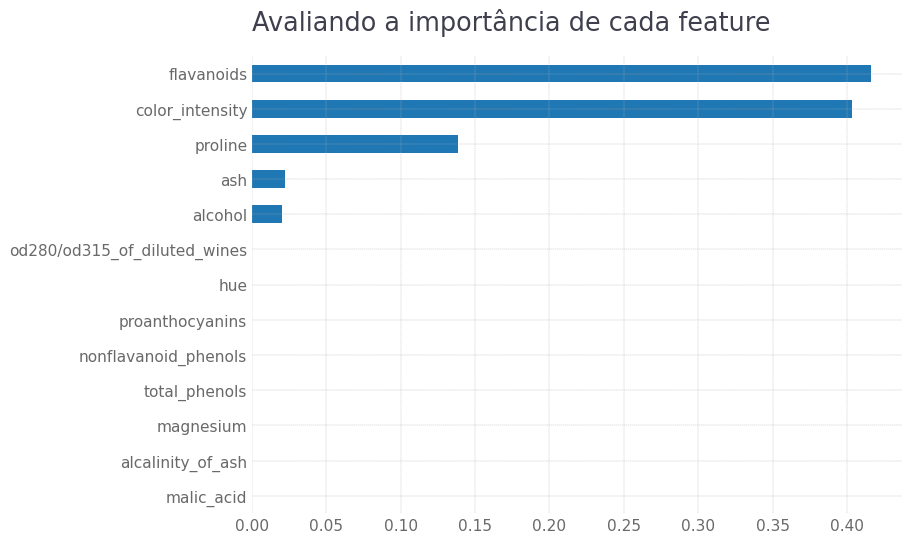

In [11]:
#instanciando o figure o e axes no matplotlib
fig, ax  = plt.subplots(figsize=(10,6), dpi=92)

#fazendo o gráfico
df.sort_values('score',ascending=True).plot(kind='barh',x='features',y='score',ax=ax)
ax.set_frame_on(False)
ax.set_title('Avaliando a importância de cada feature', # texto do título
             loc='left', # posicionamento do título no Axes
             pad=20, # Distanciamento do título com outros objetos
             fontdict={'fontsize':20}, # Tamanho da fonte utilizado
             color='#3f3f4e') # cor da fonte em hexadecimal
ax.tick_params(axis='both', # escolhendo os ticks do eixo x
               length=0, # colocamos os ticks de tamanho zero, compare com os desenhos de cima
               labelsize=12, # tamanho da fonte para os eixos
               colors='dimgrey') # cor da fonte para o eixo x
ax.set_ylabel(None)
ax.legend().remove()
ax.grid(linestyle='--',lw=0.3,aa=True)

#plotando o gráfico
plt.tight_layout();

E se quisermos **exportar** nossa árvore de decisão para outras pessoas?

Geralmente, quando utilizamos este tipo de template (com setas, nós, etc) salvamos o arquivo no formato **DOT**. Conseguimos realizar essa tarefa através do método [export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz).

O código abaixo, reproduz este processo:

In [ ]:
# exportando uma árvore de decisão em DOT format
export_graphviz(tree, # árvore de decisão a ser exportada
                out_file = 'arvore.dot',  # nome do arquivo output
                feature_names = x_train.columns, # retornar com as features
                precision=2, # número de digitos da precisão
                filled = True, # pinta os nós de acordo com cada classe
                class_names=['class_0','class_1','class_2']) # lista do nome das classes
                #special_characters=True, #
                #label = 'root', # as informações das features aparecem apenas na raíz
                #leaves_parallel = True) # faz com que as folhas fiquem paralelas
                #rotate = True); # retorna a árvore na horizontal


In [ ]:
!dot -Tpng arvore.dot -o arvore.png

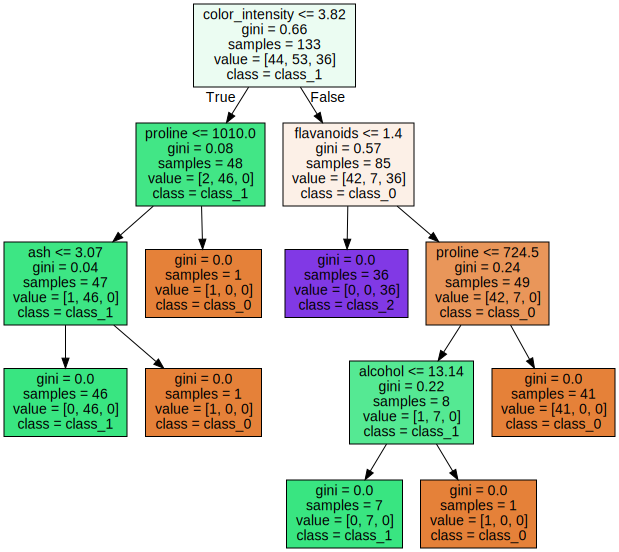

In [ ]:
# exportando uma árvore de decisão em DOT format
dot_data = export_graphviz(tree, # árvore de decisão a ser exportada
                out_file = None,  # nome do arquivo output
                feature_names = x_train.columns, # retornar com as features
                precision=2, # número de digitos da precisão
                filled = True, # -
                class_names=['class_0','class_1','class_2']) # lista do nome das classes
                #special_characters=True, #
                #label = 'root', # as informações das features aparecem apenas na raíz
                #leaves_parallel = True) # faz com que as folhas fiquem paralelas
                #rotate = True); # retorna a árvore na horizontal

graph = graphviz.Source(dot_data)
graph

Além dos formatos já apresentados, ainda é possível representar as regras de nossa árvore de decisão através de texto, utilizando o módulo [export_text](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html).

In [ ]:
print(export_text(tree, # árvore de decisão treinada
                  show_weights=True, # retorna o número de amostras de cada classe
                  spacing=5)) # dá um espaçamento entre os nós

|----- feature_9 <= 3.82
|     |----- feature_12 <= 1010.00
|     |     |----- feature_2 <= 3.07
|     |     |     |----- weights: [0.00, 46.00, 0.00] class: 1
|     |     |----- feature_2 >  3.07
|     |     |     |----- weights: [1.00, 0.00, 0.00] class: 0
|     |----- feature_12 >  1010.00
|     |     |----- weights: [1.00, 0.00, 0.00] class: 0
|----- feature_9 >  3.82
|     |----- feature_6 <= 1.40
|     |     |----- weights: [0.00, 0.00, 36.00] class: 2
|     |----- feature_6 >  1.40
|     |     |----- feature_12 <= 724.50
|     |     |     |----- feature_0 <= 13.14
|     |     |     |     |----- weights: [0.00, 7.00, 0.00] class: 1
|     |     |     |----- feature_0 >  13.14
|     |     |     |     |----- weights: [1.00, 0.00, 0.00] class: 0
|     |     |----- feature_12 >  724.50
|     |     |     |----- weights: [41.00, 0.00, 0.00] class: 0

